# **<h3 align="center">Deep Learning - Project</h3>**
# **<h3 align="center">Convolutional Neural Network</h3>**
**Group members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Ilona Nacu - 20211602@novaims.unl.pt - 20211602<br>
Francisco Farinha - 20211550@novaims.unl.pt - 20211550<br>
João Barradas - 20211590@novaims.unl.pt - 20211590<br>
Rafael Proença  - 2021681@novaims.unl.pt - 2021681<br>

# Table of Contents
* [1. Imports](#chapter1)
    * [1.1. Libraries](#section_1_1)
    * [1.2. Datasets](#section_1_2)
* [2. Prepare the Data to Model](#chapter2)
* [3. Convolutional Neural Network](#chapter3)
    * [3.1. First Model](#section_3_1)
        * [3.1.1. Modeling](#sub_section_3_1_1)
        * [3.1.2. Check Performance](#sub_section_3_1_2)        
        * [3.1.3. Problems to Solve](#sub_section_3_1_3)
    * [3.2. Second Model](#section_3_2)
        * [3.2.1. Modeling](#sub_section_3_2_1)
        * [3.2.2. Check Performance](#sub_section_3_2_2)        
        * [3.2.3. Problems to Solve](#sub_section_3_2_3)
    * [3.3. Third Model](#section_3_3)
        * [3.3.1. Modeling](#sub_section_3_3_1)
        * [3.3.2. Check Performance](#sub_section_3_3_2)        
        * [3.3.3. Problems to Solve](#sub_section_3_3_3)
    * [3.4. Fourth Model](#section_3_4)
        * [3.4.1. Modeling](#sub_section_3_4_1)
        * [3.4.2. Check Performance](#sub_section_3_4_2)        
        * [3.4.3. Problems to Solve](#sub_section_3_4_3)
    * [3.5. Fifth Model](#section_3_5)
        * [3.5.1. Modeling](#sub_section_3_5_1)
        * [3.5.2. Check Performance](#sub_section_3_5_2)        
        * [3.5.3. Problems to Solve](#sub_section_3_5_3)
    * [3.6. Sixth Model](#section_3_6)
        * [3.6.1. Modeling](#sub_section_3_6_1)
        * [3.6.2. Check Performance](#sub_section_3_6_2)        
        * [3.6.3. Problems to Solve](#sub_section_3_6_3)
* [4. Keras Tuner](#chapter4)
    * [4.1. Hyperband](#section_4_1)
    * [4.2. Best Resulting Model](#section_4_2)
* [5. Model Comparison](#chapter5)
* [6. Other Attempts](#chapter6)









Connect drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Imports <a class="anchor" id="chapter1"></a>

## 1.1. Libraries <a class="anchor" id="section_1_1"></a>

In the following cell of code, we do the needed imports to use the notebooks. This imports are divided by needs.

In [ ]:
#It may be necessary to run the line bellow, even if already installed previously
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 788.2 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

#Prepare data to CNN
from sklearn.utils.class_weight import compute_class_weight

#For construct the CNN
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.regularizers import l1, l2

#For construct the KerasTunner
from keras import backend as K
from kerastuner import HyperParameters
import kerastuner as kt

#To evaluate the CNN
import sys
sys.path.append('/content/drive/MyDrive/Deep Learning/Project - 80%/')
from utils import plot_loss, evaluate_classification_report_with_matrix, get_f1_model

## 1.2. Datasets <a class="anchor" id="section_1_2"></a>

This subsection is to load the needed data to model the Convolutional Neural Network. We opted to test two distinct preprocessing methods for the images. The first, labeled 'simples,' involves hair removal and cropping, reducing the images to just 10% of their original size. The second method, more sophisticated, not only includes hair removal and cropping but also masks out non-hematoma areas by blacking them out. These images were stored at 10% and 20% of their original sizes

In [ ]:
X_train_image_10_simples = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/X_Data/X_train_preproc_image_10_simples.npy')
X_val_image_10_simples = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/X_Data/X_val_preproc_image_10_simples.npy')
X_test_image_10_simples = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/X_Data/X_test_preproc_image_10_simples.npy')

In [ ]:
X_train_image_10 = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/X_Data/X_train_preproc_image_10.npy')
X_val_image_10 = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/X_Data/X_val_preproc_image_10.npy')
X_test_image_10 = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/X_Data/X_test_preproc_image_10.npy')

In [ ]:
X_train_image_20 = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/X_Data/X_train_preproc_image_20.npy')
X_val_image_20 = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/X_Data/X_val_preproc_image_20.npy')
X_test_image_20 = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/X_Data/X_test_preproc_image_20.npy')

In [ ]:
y_train_categorical = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/Y_Data/y_train_categorical.npy')
y_val_categorical = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/Y_Data/y_val_categorical.npy')
y_test_categorical = np.load('/content/drive/MyDrive/Deep Learning/Project - 80%/Data/Y_Data/y_test_categorical.npy')

# 2.Prepare the data to model  <a class="anchor" id="chapter2"></a>

Since the images are already pre-processed, we will use this chapter to check shapes and create class weigths.

In [ ]:
print(X_train_image_10.shape)
print(X_train_image_10[1].shape , "\n")

print(X_train_image_20.shape)
print(X_train_image_20[1].shape , "\n")

(6384, 40, 60, 3)
(40, 60, 3) 

(6384, 80, 120, 3)
(80, 120, 3) 



In [ ]:
y_train_categorical.shape

(6384, 7)

In [ ]:
print(X_val_image_10.shape)
print(X_val_image_10[1].shape , "\n")

print(X_val_image_20.shape)
print(X_val_image_20[1].shape , "\n")

(1127, 40, 60, 3)
(40, 60, 3) 

(1127, 80, 120, 3)
(80, 120, 3) 



In [ ]:
y_val_categorical.shape

(1127, 7)

In [ ]:
print(X_test_image_10.shape)
print(X_test_image_10[1].shape , "\n")

print(X_test_image_20.shape)
print(X_test_image_20[1].shape , "\n")

(2504, 40, 60, 3)
(40, 60, 3) 

(2504, 80, 120, 3)
(80, 120, 3) 



In [ ]:
#Defining our models' input shape, so that we can test with both sizes and see if it makes a big difference
input_shape_10 = (40, 60, 3)
input_shape_20 = (80, 120, 3)

Our data is unbalanced, for this motive we define class_weights, and test model performance with them.

In [ ]:
y_integers = np.argmax(y_train_categorical, axis=1)
class_weights = compute_class_weight('balanced', classes= np.unique(y_integers), y= y_integers)
d_class_weights = dict(enumerate(class_weights))

In [ ]:
d_class_weights

{0: 4.384615384615385,
 1: 2.7889908256880735,
 2: 1.302857142857143,
 3: 12.493150684931507,
 4: 1.2845070422535212,
 5: 0.21333333333333335,
 6: 10.021978021978022}

# 3.Convolutional Neural Network  <a class="anchor" id="chapter3"></a>
----
We tested various models, with many different parameters and structures. The ones present are the ones we feel can give more insights into our process and the most important conclusions that we could glean from the models and our data.

We begin by testing a few simpler models, smaller. We then proceeded to try to solve some of the issues that came up, such as overfitting. It seemed interesting to us to try to test some models with more neurons and more layers, with different architectures than the standard convolution-pooling scheme.

The next section shows the most insightful attempts we obtained.

To better understand our models, it is important to have in mind the basic definition of:

- **Convolutional Layers:** These layers extract features from the images by sliding filters across the data, identifying patterns like edges or textures.

- **MaxPooling:** Following convolutional layers, MaxPooling reduces the data's spatial dimensions while retaining important information by selecting the maximum value within small regions.

- **AveragePooling:** Similar to max pooling, but instead of the maximum value, it takes the average of a small sections in the feature map.

- **Flattening:** Converts the multidimensional output from convolutional and pooling layers into a one-dimensional array, preparing it for input into fully connected layers.

- **Intermediate Dense Layer:** A fully connected layer that processes the flattened features, enabling the network to learn complex patterns before making classification decisions.

- **Softmax Function:** In our project, this is used in the output layer for classification tasks, like type of skin lesion, as our case, it calculates class probabilities, ensuring the sum of probabilities for all classes equals 1 and aiding in making informed classification decisions.

## 3.1. First Model <a class="anchor" id="section_3_1"></a>

To begin we start with a very simple model. Also, in this first model we will test with the more simple pre processing images (X_train_image_10_simples) and the more advances with 10% and 20%. These tests will be in 6. Other Attempts. We will be using the image size at 10%, with all the preprocessing steps,since overall it gave us the best results. This is also what will be used for the rest of the models.

### 3.1.1. Modeling <a class="anchor" id="sub_section_3_1_1"></a>

This is the part we construct the model. In this case we have a simpler model, just to see what our baseline is. <br>
Since our target is the classification of a type of lesion we use softmax function.

In [ ]:
# Define input layer
input_layer = Input(shape=input_shape_10)

# Convolutional layers
conv1 = Conv2D(20, kernel_size=(3, 3), padding="same", activation="relu")(input_layer)
pool1 = MaxPooling2D(pool_size=(3, 3))(conv1)
conv2 = Conv2D(40, kernel_size=(3, 3), padding="same", activation="relu")(pool1)
pool2 = MaxPooling2D(pool_size=(3, 3))(conv2)
conv3 = Conv2D(60, kernel_size=(3, 3), padding="same", activation="relu")(pool2)

# Flatten and intermediate Dense layers
flatten = Flatten()(conv3)
dense1 = Dense(512, activation="relu")(flatten)  # Intermediate Dense layer
dense2 = Dense(256, activation="relu")(dense1)  # The subsequent Dense layer

# Output layer
output_layer = Dense(7, activation="softmax")(dense2)  # Output layer for classification

# Create the model
model_1 = Model(inputs=input_layer, outputs=output_layer)
model_1.summary()

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Saving our first model
model_1.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/first_cnn_simple.keras")

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 40, 60, 3)]       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 40, 60, 20)        560       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 20, 20)        0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 13, 20, 40)        7240      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 6, 40)          0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 4, 6, 60)          216

In [ ]:
history_1 = model_1.fit(
    x=X_train_image_10,
    y=y_train_categorical,
    batch_size=200,
    epochs=40,
    validation_data=(X_val_image_10, y_val_categorical)
)

Epoch 1/40
32/32 [==============================] - 10s 243ms/step - loss: 1.1093 - accuracy: 0.6634 - val_loss: 0.9252 - val_accuracy: 0.6903
Epoch 2/40
32/32 [==============================] - 8s 244ms/step - loss: 0.8664 - accuracy: 0.7016 - val_loss: 0.8590 - val_accuracy: 0.6903
Epoch 3/40
32/32 [==============================] - 8s 240ms/step - loss: 0.8091 - accuracy: 0.7057 - val_loss: 0.8375 - val_accuracy: 0.7019
Epoch 4/40
32/32 [==============================] - 7s 231ms/step - loss: 0.7710 - accuracy: 0.7226 - val_loss: 0.7499 - val_accuracy: 0.7214
Epoch 5/40
32/32 [==============================] - 7s 233ms/step - loss: 0.7156 - accuracy: 0.7367 - val_loss: 0.7141 - val_accuracy: 0.7320
Epoch 6/40
32/32 [==============================] - 7s 224ms/step - loss: 0.6805 - accuracy: 0.7462 - val_loss: 0.7274 - val_accuracy: 0.7365
Epoch 7/40
32/32 [==============================] - 7s 219ms/step - loss: 0.6619 - accuracy: 0.7487 - val_loss: 0.6874 - val_accuracy: 0.7303
Epoch

### 3.1.2.  Check performance <a class="anchor" id="sub_section_3_1_2"></a>

In check performance section, it is time to check the plot of our loss thorought the training of the model, the classification report and also the confusion matrix to understand how our model is working, if we have overfitting, some classes that migth be not predicted and so on.

Since we are always evaluating the performance of each model. We decided to create a function (that is available in utils) named plot_loss() and another evaluate_classification_report().

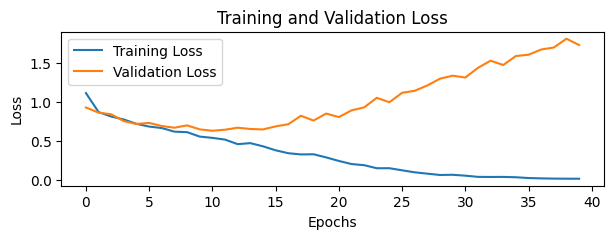

In [ ]:
plot_loss(history_1)

In [ ]:
evaluate_classification_report_with_matrix(model_1, X_train_image_10, y_train_categorical, matrix = False)

200/200 [==============================] - 4s 18ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       208
           1       0.95      1.00      0.97       327
           2       1.00      0.99      1.00       700
           3       0.99      1.00      0.99        73
           4       1.00      1.00      1.00       710
           5       1.00      1.00      1.00      4275
           6       1.00      1.00      1.00        91

    accuracy                           1.00      6384
   macro avg       0.99      0.99      0.99      6384
weighted avg       1.00      1.00      1.00      6384



36/36 [==============================] - 1s 18ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.51      0.53        37
           1       0.63      0.57      0.60        58
           2       0.42      0.41      0.42       124
           3       0.42      0.38      0.40        13
           4       0.33      0.25      0.28       125
           5       0.85      0.91      0.88       754
           6       0.77      0.62      0.69        16

    accuracy                           0.74      1127
   macro avg       0.57      0.52      0.54      1127
weighted avg       0.72      0.74      0.73      1127



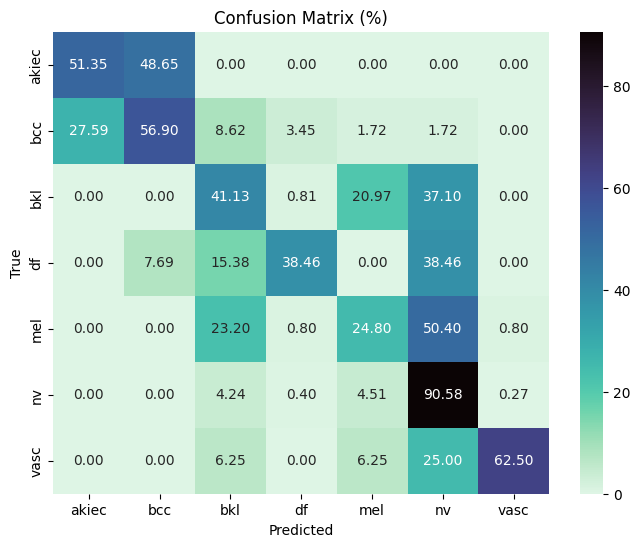

In [ ]:
evaluate_classification_report_with_matrix(model_1, X_val_image_10, y_val_categorical)

79/79 [==============================] - 2s 20ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.41      0.49        82
           1       0.72      0.74      0.73       129
           2       0.42      0.40      0.41       275
           3       0.34      0.41      0.38        29
           4       0.33      0.27      0.30       278
           5       0.83      0.87      0.85      1676
           6       0.36      0.29      0.32        35

    accuracy                           0.71      2504
   macro avg       0.51      0.48      0.50      2504
weighted avg       0.70      0.71      0.71      2504



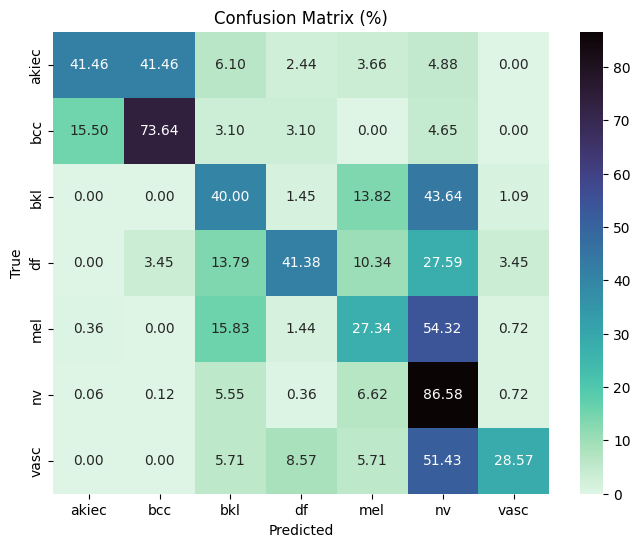

In [ ]:
evaluate_classification_report_with_matrix(model_1, X_test_image_10, y_test_categorical)

> **Choosing the preprocessing image and also the size:** throughout the plot of the loss ,and taking into acount the classification report and the confusion matrix, the more complex preprocessing predicts better the overall classes, which can be seen both for the weighted f1 and the macro f1. In regard to the size of the image, with 20% we can see that a higher image size did not necessarily mean a higher performance. Most likely, the model's architecture would have to be adjusted for it to work better, but since we obtain good enough results with a smaller size, and we do not want to risk exhausting our computing resources, we will keep using the smaller images. For these reasons, we will use the 10% image size with the more complex pre-processing.

### 3.1.3 Problems to solve <a class="anchor" id="sub_section_3_1_3"></a>

>By looking at the plots and scores, we can see that our initial model presents very high overfitting. Here are some techniques to prevent the overfitting:
- **Dropout:** Introduce dropout layers within the network to prevent overfitting by randomly dropping units during training.
- **Weight Regularization:** Apply L1 or L2 regularization to penalize large weights in the network, preventing it from fitting noise in the data.
- Callbacks, such as early stop and reducing the learning rate throughout training,
- ImageDataGenerator, to generate more images and, hence, increasing the sampe size.
<br>


Also through the classification report, we were able to see that, there are some
classes that are being predicted as another as much as being correctly predicted. That's the case of _bkl_
that is being good predicted as predicted as _nv_. Also, the _mel_ class is being wrongly predicted as _nv_ a little bit more than the other. The same for _bkl_ and _nv_.

To help with this we can add:
- **Manual Class Weights:** Assign different weights to the classes based on their importance. Classes that are
underrepresented or misclassified more often can be given higher weights to increase their importance during training.

Let's try something to solve the problems above.
- Trying to decrease overfitting with callbacks and dropout.


## 3.2. Second Model <a class="anchor" id="section_3_2"></a>

Since we have overfitting we will add callbaks and balanced class weights, and see if they then need to be adjusted.

In [ ]:
# Definition of the callback - Reduce Learning Rate on Plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitors the validation loss for changes
    factor=0.25,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=5)  # Number of epochs with no improvement after which learning rate will be reduced

In [ ]:
early_stop = EarlyStopping(
              monitor='val_loss',  # Monitors the validation loss for changes
              patience=5,  # Number of epochs with no improvement after which training will be stopped
              mode='min')  # Direction of the monitored quantity improvement

In [ ]:
d_class_weights

{0: 4.384615384615385,
 1: 2.7889908256880735,
 2: 1.302857142857143,
 3: 12.493150684931507,
 4: 1.2845070422535212,
 5: 0.21333333333333335,
 6: 10.021978021978022}

### 3.2.1. Modeling <a class="anchor" id="sub_section_3_2_1"></a>

In [ ]:
# Define input layer
input_layer = Input(shape=input_shape_10)

# Convolutional layers
conv1 = Conv2D(40, kernel_size=(3, 3), padding="same", activation="relu")(input_layer)
pool1 = AveragePooling2D(pool_size=(3, 3))(conv1)
conv2 = Conv2D(60, kernel_size=(3, 3), padding="same", activation="relu")(pool1)
pool2 = AveragePooling2D(pool_size=(3, 3))(conv2)
conv3 = Conv2D(80, kernel_size=(3, 3), padding="same", activation="relu")(pool2)

# Flatten and intermediate Dense layers
flatten = Flatten()(conv3)
dense1 = Dense(512, activation="relu", kernel_regularizer=l1(0.0001))(flatten)  # Intermediate Dense layer
dropout1 = Dropout(0.8)(dense1)  # Dropout layer with 50% dropout rate
dense2 = Dense(256, activation="relu", kernel_regularizer=l1(0.0001))(dense1)  # The subsequent Dense layer

output_layer = Dense(7, activation="softmax")(dense2)  # Output layer for classification
#
# Create the model
model_2 = Model(inputs=input_layer, outputs=output_layer)
model_2.summary()

# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Saving the model
model_2.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/second_cnn_weigths.keras")

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 40, 60, 3)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 40, 60, 40)        1120      
                                                                 
 average_pooling2d_12 (Aver  (None, 13, 20, 40)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_33 (Conv2D)          (None, 13, 20, 60)        21660     
                                                                 
 average_pooling2d_13 (Aver  (None, 4, 6, 60)          0         
 agePooling2D)                                                   
                                                                 
 conv2d_34 (Conv2D)          (None, 4, 6, 80)          4328

In [ ]:
history_2 = model_2.fit(
    x=X_train_image_10,
    y=y_train_categorical,
    batch_size=200,
    epochs=40,
    class_weight = d_class_weights,
    validation_data=(X_val_image_10, y_val_categorical),
    callbacks=[reduce_lr, early_stop]
    )

Epoch 1/40
32/32 [==============================] - 17s 427ms/step - loss: 3.6835 - accuracy: 0.4388 - val_loss: 2.5628 - val_accuracy: 0.5750 - lr: 0.0010
Epoch 2/40
32/32 [==============================] - 13s 392ms/step - loss: 2.2930 - accuracy: 0.4970 - val_loss: 2.0708 - val_accuracy: 0.2032 - lr: 0.0010
Epoch 3/40
32/32 [==============================] - 12s 386ms/step - loss: 1.9365 - accuracy: 0.4477 - val_loss: 2.1193 - val_accuracy: 0.2369 - lr: 0.0010
Epoch 4/40
32/32 [==============================] - 13s 392ms/step - loss: 1.7622 - accuracy: 0.4442 - val_loss: 1.5669 - val_accuracy: 0.5182 - lr: 0.0010
Epoch 5/40
32/32 [==============================] - 13s 405ms/step - loss: 1.6354 - accuracy: 0.5166 - val_loss: 1.6958 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 6/40
32/32 [==============================] - 16s 508ms/step - loss: 1.5398 - accuracy: 0.5293 - val_loss: 1.3822 - val_accuracy: 0.5581 - lr: 0.0010
Epoch 7/40
32/32 [==============================] - 13s 414ms/st

### 3.2.2. Check Performance <a class="anchor" id="sub_section_3_2_2"></a>

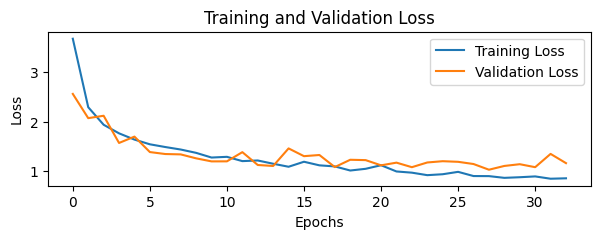

In [ ]:
plot_loss(history_2)

In [ ]:
evaluate_classification_report_with_matrix(model_2, X_train_image_10, y_train_categorical, matrix = False)

200/200 [==============================] - 6s 29ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       208
           1       0.85      0.79      0.82       327
           2       0.46      0.33      0.38       700
           3       0.15      0.99      0.26        73
           4       0.27      0.60      0.38       710
           5       0.93      0.63      0.76      4275
           6       0.22      0.99      0.36        91

    accuracy                           0.62      6384
   macro avg       0.51      0.73      0.53      6384
weighted avg       0.78      0.62      0.66      6384



36/36 [==============================] - 1s 28ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.73      0.67        37
           1       0.81      0.66      0.72        58
           2       0.41      0.29      0.34       124
           3       0.13      1.00      0.24        13
           4       0.27      0.61      0.37       125
           5       0.93      0.62      0.74       754
           6       0.16      0.69      0.27        16

    accuracy                           0.59      1127
   macro avg       0.48      0.66      0.48      1127
weighted avg       0.76      0.59      0.64      1127



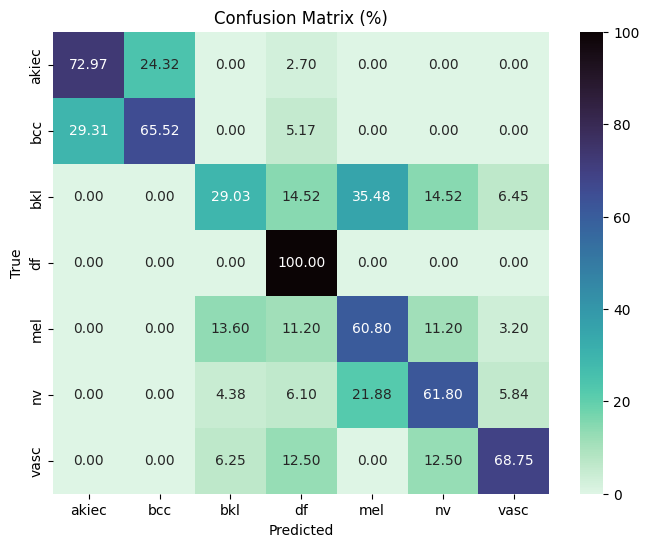

In [ ]:
evaluate_classification_report_with_matrix(model_2, X_val_image_10, y_val_categorical)

79/79 [==============================] - 2s 29ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        82
           1       0.75      0.60      0.66       129
           2       0.46      0.28      0.35       275
           3       0.10      0.69      0.18        29
           4       0.25      0.59      0.35       278
           5       0.92      0.62      0.74      1676
           6       0.15      0.80      0.26        35

    accuracy                           0.58      2504
   macro avg       0.45      0.60      0.44      2504
weighted avg       0.76      0.58      0.63      2504



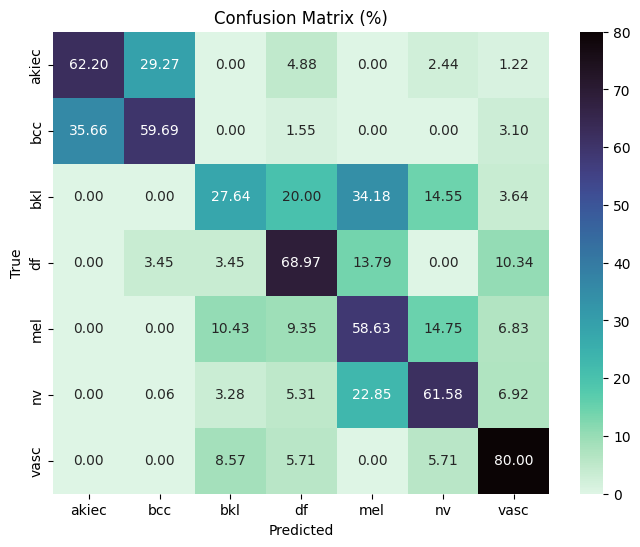

In [ ]:
evaluate_classification_report_with_matrix(model_2, X_test_image_10, y_test_categorical)

### 3.2.3. Observations <a class="anchor" id="sub_section_3_2_3"></a>

> Despite the overall f1_score decrease, overfitting is also substantially lower. We do want to try to improve the score from 0.64 on validation and test, and improve results on certain classes, that are not being predicted as well, such as bkl, bcc and akiec.

## 3.3. Third Model <a class="anchor" id="section_3_3"></a>

In this model, we will add the datagen to try to deal with the overfiting problem and check if with more data, performance improves. Also, we will be manually adjusting the class weights.


### 3.3.1 Modeling <a class="anchor" id="sub_section_3_3_1"></a>

In [ ]:
d_class_weights

{0: 4.384615384615385,
 1: 2.7889908256880735,
 2: 1.302857142857143,
 3: 12.493150684931507,
 4: 1.2845070422535212,
 5: 0.21333333333333335,
 6: 10.021978021978022}

In [ ]:
manual_weights = {
          0: 2.5,
          1: 10,
          2: 7,
          3: 12.493150684931507,
          4: 1.2845070422535212,
          5: 0.21333333333333335,
          6: 8
}


# Apply the manual weights
class_weights = [manual_weights[i] for i in np.unique(y_integers)]
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
#Image data generator
datagen = ImageDataGenerator(
        featurewise_center=False,  # Set the input mean to 0 for each feature over the dataset
        samplewise_center=False,   # Set the mean of each sample to 0
        featurewise_std_normalization=False,  # Divide the inputs by the standard deviation of the dataset
        samplewise_std_normalization=False,   # Divide each input by its standard deviation
        zca_whitening=False,  # Apply whitening
        rotation_range=10,    # Range within which to randomly rotate images
        zoom_range = 0.1,     # Range for random zoom
        width_shift_range=0.1,   # Fraction of total width for horizontal random shifts
        height_shift_range=0.1,  # Fraction of total height for vertical random shifts
        horizontal_flip=True,    # Randomly flip images horizontally
        vertical_flip=True)      # Randomly flip images vertically


datagen.fit(X_train_image_10)

In [ ]:
# Define input layer
input_layer = Input(shape=input_shape_10)

# Convolutional layers
conv1 = Conv2D(40, kernel_size=(3, 3), padding="same", activation="relu")(input_layer)
pool1 = MaxPooling2D(pool_size=(3, 3))(conv1)
conv2 = Conv2D(60, kernel_size=(3, 3), padding="same", activation="relu")(pool1)
pool2 = MaxPooling2D(pool_size=(3, 3))(conv2)
conv3 = Conv2D(80, kernel_size=(3, 3), padding="same", activation="relu")(pool2)

# Flatten and intermediate Dense layers
flatten = Flatten()(conv3)
dense1 = Dense(256, activation="relu", kernel_regularizer=l1(0.0001))(flatten)  # Intermediate Dense layer with L2 regularization
dropout1 = Dropout(0.5)(dense1)  # Dropout layer with 50% dropout rate
dense2 = Dense(128, activation="relu", kernel_regularizer=l1(0.0001))(dropout1)  # The subsequent Dense layer

output_layer = Dense(7, activation="softmax")(dense2)  # Output layer for classification

# Create the model
model_3 = Model(inputs=input_layer, outputs=output_layer)
model_3.summary()

# Compile the model
model_3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

#Saving the model
model_3.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/third_cnn_weigths.keras")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 40, 60, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 60, 40)        1120      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 20, 40)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 20, 60)        21660     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 6, 60)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 6, 80)          4328

In [ ]:
# Train the model using augmented data batches
history_3 = model_3.fit(datagen.flow(X_train_image_10, y_train_categorical, batch_size=200),
    batch_size=200,
    epochs=40,
    validation_data=datagen.flow(X_val_image_10, y_val_categorical, batch_size=100),
    class_weight=class_weights_dict,
    callbacks=[reduce_lr, early_stop])

Epoch 1/40
32/32 [==============================] - 30s 837ms/step - loss: 4.1074 - accuracy: 0.1136 - val_loss: 2.6761 - val_accuracy: 0.1295 - lr: 0.0010
Epoch 2/40
32/32 [==============================] - 23s 706ms/step - loss: 3.1998 - accuracy: 0.1275 - val_loss: 2.2627 - val_accuracy: 0.1384 - lr: 0.0010
Epoch 3/40
32/32 [==============================] - 24s 753ms/step - loss: 2.9628 - accuracy: 0.1369 - val_loss: 2.0943 - val_accuracy: 0.1358 - lr: 0.0010
Epoch 4/40
32/32 [==============================] - 23s 714ms/step - loss: 2.6831 - accuracy: 0.1441 - val_loss: 2.2824 - val_accuracy: 0.1464 - lr: 0.0010
Epoch 5/40
32/32 [==============================] - 24s 741ms/step - loss: 2.6750 - accuracy: 0.1421 - val_loss: 2.0674 - val_accuracy: 0.1437 - lr: 0.0010
Epoch 6/40
32/32 [==============================] - 22s 696ms/step - loss: 2.3597 - accuracy: 0.1626 - val_loss: 2.1511 - val_accuracy: 0.1562 - lr: 0.0010
Epoch 7/40
32/32 [==============================] - 24s 746ms/st

### 3.3.2. Check Performance <a class="anchor" id="sub_section_3_3_2"></a>

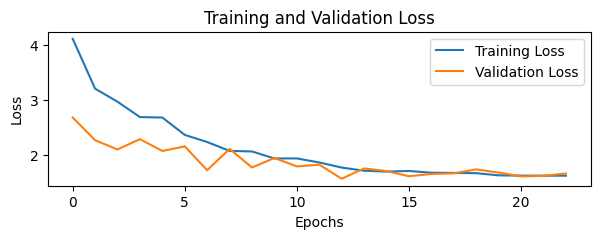

In [ ]:
plot_loss(history_3)

In [ ]:
evaluate_classification_report_with_matrix(model_3, X_train_image_10, y_train_categorical, matrix = False)

200/200 [==============================] - 6s 25ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       208
           1       0.17      0.99      0.29       327
           2       0.14      0.55      0.23       700
           3       0.14      0.42      0.21        73
           4       0.00      0.00      0.00       710
           5       0.98      0.29      0.45      4275
           6       0.23      0.73      0.35        91

    accuracy                           0.32      6384
   macro avg       0.24      0.43      0.22      6384
weighted avg       0.69      0.32      0.35      6384



C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 1s 29ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.17      1.00      0.29        58
           2       0.16      0.60      0.26       124
           3       0.17      0.62      0.27        13
           4       0.00      0.00      0.00       125
           5       0.99      0.32      0.48       754
           6       0.23      0.69      0.35        16

    accuracy                           0.35      1127
   macro avg       0.25      0.46      0.24      1127
weighted avg       0.70      0.35      0.37      1127



C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


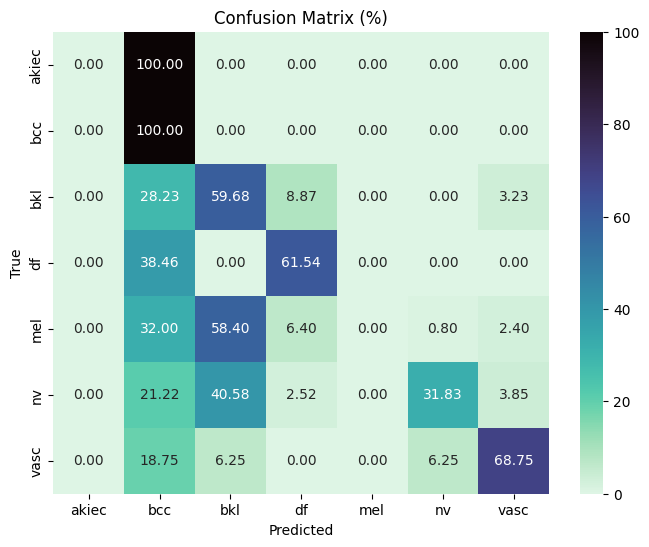

In [ ]:
evaluate_classification_report_with_matrix(model_3, X_val_image_10, y_val_categorical)

79/79 [==============================] - 3s 34ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.17      0.98      0.29       129
           2       0.15      0.59      0.24       275
           3       0.14      0.41      0.21        29
           4       0.00      0.00      0.00       278
           5       0.98      0.28      0.44      1676
           6       0.19      0.69      0.30        35

    accuracy                           0.32      2504
   macro avg       0.23      0.42      0.21      2504
weighted avg       0.69      0.32      0.34      2504



C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


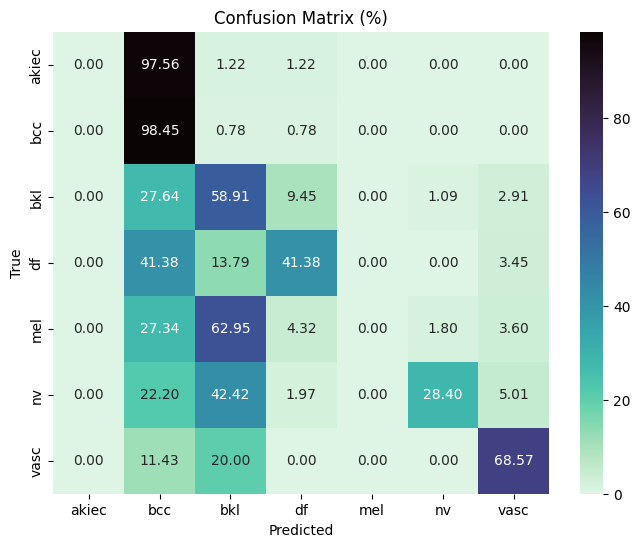

In [ ]:
evaluate_classification_report_with_matrix(model_3, X_test_image_10, y_test_categorical)

### 3.3.3. Observations <a class="anchor" id="sub_section_3_3_3"></a>

>The results are completely awful, most classes aren't being predicted at all. Either there is a mistake, which we believe there is not, or the model's architecture or the generator's parameters need to be adjusted.

## 3.4. Fourth Model <a class="anchor" id="section_3_4"></a>

We want to try to deepen our CNN and try having some convolution layers in a row, instead of the standard convolution-pooling and check if the results improve.
We are also trying the average pooling, instead of max pooling.


### 3.4.1 Modeling <a class="anchor" id="sub_section_3_4_1"></a>

In [ ]:
# Define input layer
input_layer = Input(shape=input_shape_10)

# Convolutional layers
conv1 = Conv2D(40, kernel_size=(3, 3), padding="same", activation="relu")(input_layer)
conv2 = Conv2D(40, kernel_size=(3, 3), padding="same", activation="relu")(conv1)
conv3 = Conv2D(40, kernel_size=(3, 3), padding="same", activation="relu")(conv2)
pool1 = AveragePooling2D(pool_size=(3, 3))(conv2)
conv4 = Conv2D(80, kernel_size=(3, 3), padding="same", activation="relu")(pool1)
conv5 = Conv2D(80, kernel_size=(3, 3), padding="same", activation="relu")(conv4)
pool2 = AveragePooling2D(pool_size=(3, 3))(conv5)
conv6 = Conv2D(100, kernel_size=(3, 3), padding="same", activation="relu")(pool2)

# Flatten and intermediate Dense layers
flatten = Flatten()(conv6)
dense1 = Dense(512, activation="relu", kernel_regularizer=l1(0.001))(flatten)  # Intermediate Dense layer with L2 regularization
dropout1 = Dropout(0.5)(dense1)  # Dropout layer with 50% dropout rate
dense2 = Dense(256, activation="relu", kernel_regularizer=l1(0.001))(dropout1)  # The subsequent Dense layer

# Output layer
output_layer = Dense(7, activation="softmax")(dense2)  # Output layer for classification

# Create the model
model_4 = Model(inputs=input_layer, outputs=output_layer)
model_4.summary()

# Compile the model
model_4.compile(optimizer=Adam(learning_rate = 0.002), loss='categorical_crossentropy', metrics=['accuracy'])

#Saving our fourth model
model_4.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/fourth_cnn_weigths.keras")

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 40, 60, 3)]       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 40, 60, 40)        1120      
                                                                 
 conv2d_52 (Conv2D)          (None, 40, 60, 40)        14440     
                                                                 
 average_pooling2d_18 (Aver  (None, 13, 20, 40)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_54 (Conv2D)          (None, 13, 20, 80)        28880     
                                                                 
 conv2d_55 (Conv2D)          (None, 13, 20, 80)        57680     
                                                          

In [ ]:
history_4 = model_4.fit(
    x=X_train_image_10,
    y=y_train_categorical,
    batch_size=200,
    epochs=40,
    validation_data=(X_val_image_10, y_val_categorical),
    callbacks=[reduce_lr, early_stop])

Epoch 1/40
32/32 [==============================] - 54s 2s/step - loss: 13.4328 - accuracy: 0.6540 - val_loss: 4.0246 - val_accuracy: 0.6690 - lr: 0.0020
Epoch 2/40
32/32 [==============================] - 49s 2s/step - loss: 2.4848 - accuracy: 0.6696 - val_loss: 1.7910 - val_accuracy: 0.6690 - lr: 0.0020
Epoch 3/40
32/32 [==============================] - 52s 2s/step - loss: 1.5467 - accuracy: 0.6731 - val_loss: 1.4117 - val_accuracy: 0.6930 - lr: 0.0020
Epoch 4/40
32/32 [==============================] - 47s 1s/step - loss: 1.3598 - accuracy: 0.6972 - val_loss: 1.3248 - val_accuracy: 0.6877 - lr: 0.0020
Epoch 5/40
32/32 [==============================] - 49s 2s/step - loss: 1.3002 - accuracy: 0.7016 - val_loss: 1.2908 - val_accuracy: 0.6912 - lr: 0.0020
Epoch 6/40
32/32 [==============================] - 48s 2s/step - loss: 1.2812 - accuracy: 0.6955 - val_loss: 1.2896 - val_accuracy: 0.6832 - lr: 0.0020
Epoch 7/40
32/32 [==============================] - 49s 2s/step - loss: 1.2532 - 

### 3.4.2. Check Performance <a class="anchor" id="sub_section_3_4_2"></a>

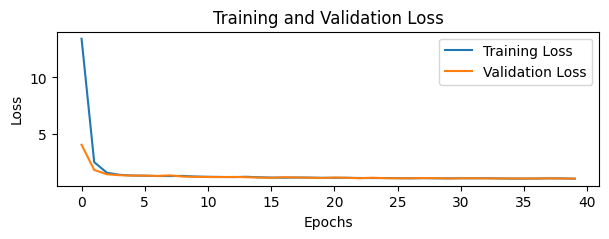

In [ ]:
plot_loss(history_4)

In [ ]:
evaluate_classification_report_with_matrix(model_4, X_train_image_10, y_train_categorical, matrix = False)

200/200 [==============================] - 14s 70ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       208
           1       0.60      0.99      0.75       327
           2       0.56      0.37      0.45       700
           3       0.75      0.08      0.15        73
           4       0.30      0.00      0.01       710
           5       0.79      0.99      0.87      4275
           6       0.00      0.00      0.00        91

    accuracy                           0.75      6384
   macro avg       0.43      0.35      0.32      6384
weighted avg       0.66      0.75      0.68      6384



C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 3s 72ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.60      1.00      0.75        58
           2       0.45      0.27      0.34       124
           3       1.00      0.08      0.14        13
           4       1.00      0.02      0.05       125
           5       0.77      0.98      0.86       754
           6       0.00      0.00      0.00        16

    accuracy                           0.74      1127
   macro avg       0.55      0.33      0.31      1127
weighted avg       0.72      0.74      0.66      1127



C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


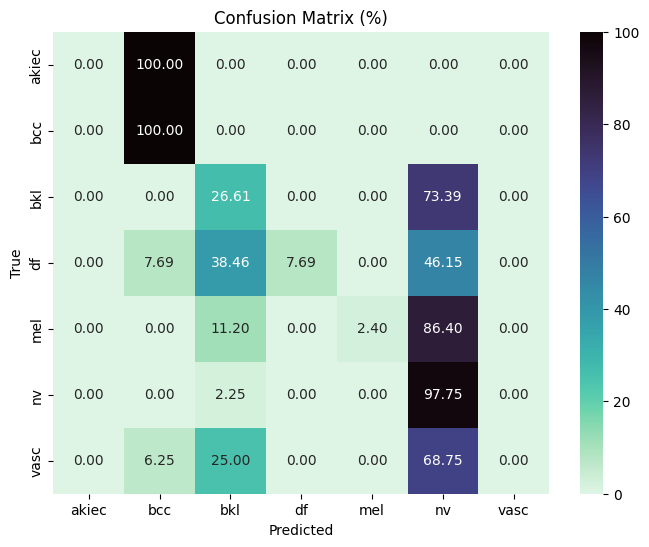

In [ ]:
evaluate_classification_report_with_matrix(model_4, X_val_image_10, y_val_categorical)

79/79 [==============================] - 6s 69ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.60      0.98      0.74       129
           2       0.50      0.35      0.41       275
           3       0.50      0.07      0.12        29
           4       0.00      0.00      0.00       278
           5       0.78      0.97      0.87      1676
           6       0.00      0.00      0.00        35

    accuracy                           0.74      2504
   macro avg       0.34      0.34      0.31      2504
weighted avg       0.61      0.74      0.66      2504



C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


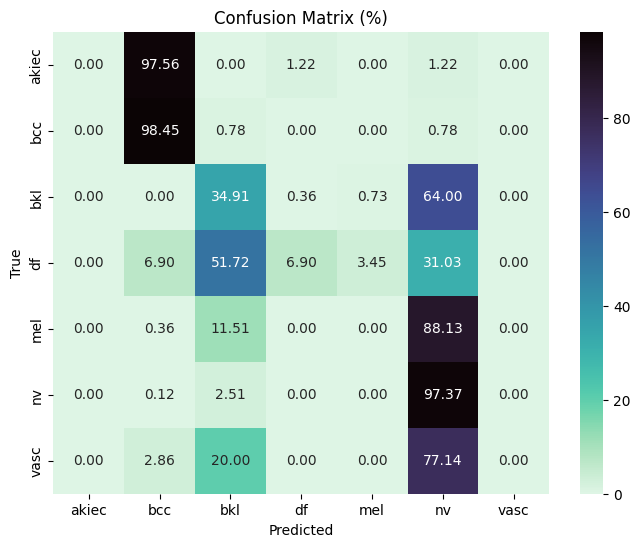

In [ ]:
evaluate_classification_report_with_matrix(model_4, X_test_image_10, y_test_categorical)

### 3.4.3. Observations <a class="anchor" id="sub_section_3_4_3"></a>

>Model performance increased, when compared to simpler models, in this case, the class weigths migth be needed since there are some classes that are not being predicted. But in terms of performance, this is the best one.

## 3.5. Fifth Model <a class="anchor" id="section_3_5"></a>

### 3.5.1 Modeling <a class="anchor" id="sub_section_3_5_1"></a>

In [ ]:
# Define input layer
input_layer = Input(shape=input_shape_10)

# Convolutional layers
conv1 = Conv2D(40, kernel_size=(3, 3), padding="same", activation="relu")(input_layer)
conv2 = Conv2D(40, kernel_size=(3, 3), padding="same", activation="relu")(conv1)
pool1 = MaxPooling2D(pool_size=(3, 3))(conv2)
conv4 = Conv2D(80, kernel_size=(3, 3), padding="same", activation="relu")(pool1)
conv5 = Conv2D(80, kernel_size=(3, 3), padding="same", activation="relu")(conv4)
pool2 = MaxPooling2D(pool_size=(3, 3))(conv5)
conv6 = Conv2D(120, kernel_size=(3, 3), padding="same", activation="relu")(pool2)

# Flatten and intermediate Dense layers
flatten = Flatten()(conv6)
dense1 = Dense(256, activation="relu", kernel_regularizer=l2(0.01))(flatten)  # Intermediate Dense layer with L2 regularization
dropout1 = Dropout(0.8)(dense1)  # Dropout layer with 50% dropout rate
dense2 = Dense(128, activation="relu", kernel_regularizer=l2(0.01))(dropout1)  # The subsequent Dense layer

# Output layer
output_layer = Dense(7, activation="softmax")(dense2)  # Output layer for classification

# Create the model
model_5 = Model(inputs=input_layer, outputs=output_layer)
model_5.summary()

# Compile the model
model_5.compile(optimizer=RMSprop(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#Saving the model
model_5.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/fifth_cnn_weigths.keras")

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 40, 60, 3)]       0         
                                                                 
 conv2d_57 (Conv2D)          (None, 40, 60, 40)        1120      
                                                                 
 conv2d_58 (Conv2D)          (None, 40, 60, 40)        14440     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 20, 40)        0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 13, 20, 80)        28880     
                                                                 
 conv2d_60 (Conv2D)          (None, 13, 20, 80)        57680     
                                                          

In [ ]:
history_5 = model_5.fit(
    x=X_train_image_10,
    y=y_train_categorical,
    batch_size=100,
    epochs=70,
    class_weight=class_weights_dict,
    validation_data=(X_val_image_10, y_val_categorical)
    ,callbacks=[reduce_lr, early_stop]
    )

Epoch 1/70
64/64 [==============================] - 48s 715ms/step - loss: 5.2988 - accuracy: 0.1028 - val_loss: 2.7090 - val_accuracy: 0.1127 - lr: 0.0010
Epoch 2/70
64/64 [==============================] - 45s 702ms/step - loss: 3.2998 - accuracy: 0.1211 - val_loss: 2.0176 - val_accuracy: 0.1358 - lr: 0.0010
Epoch 3/70
64/64 [==============================] - 45s 698ms/step - loss: 2.9903 - accuracy: 0.1264 - val_loss: 1.9802 - val_accuracy: 0.1393 - lr: 0.0010
Epoch 4/70
64/64 [==============================] - 45s 700ms/step - loss: 2.7887 - accuracy: 0.1317 - val_loss: 1.9133 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 5/70
64/64 [==============================] - 44s 696ms/step - loss: 2.7122 - accuracy: 0.1316 - val_loss: 1.6782 - val_accuracy: 0.1482 - lr: 0.0010
Epoch 6/70
64/64 [==============================] - 47s 735ms/step - loss: 2.5530 - accuracy: 0.1411 - val_loss: 2.1083 - val_accuracy: 0.1358 - lr: 0.0010
Epoch 7/70
64/64 [==============================] - 59s 932ms/st

### 3.5.2. Check Performance <a class="anchor" id="sub_section_3_5_2"></a>

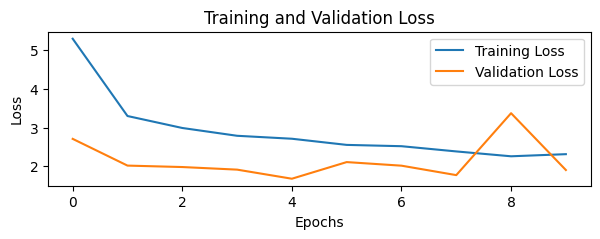

In [ ]:
plot_loss(history_5)

In [ ]:
evaluate_classification_report_with_matrix(model_5, X_train_image_10, y_train_categorical, matrix = False)

200/200 [==============================] - 14s 66ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       208
           1       0.61      0.95      0.74       327
           2       0.12      1.00      0.21       700
           3       0.00      0.00      0.00        73
           4       0.00      0.00      0.00       710
           5       0.00      0.00      0.00      4275
           6       0.00      0.00      0.00        91

    accuracy                           0.16      6384
   macro avg       0.10      0.28      0.14      6384
weighted avg       0.04      0.16      0.06      6384



C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 2s 66ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.60      0.95      0.74        58
           2       0.12      1.00      0.21       124
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00       125
           5       0.00      0.00      0.00       754
           6       0.00      0.00      0.00        16

    accuracy                           0.16      1127
   macro avg       0.10      0.28      0.14      1127
weighted avg       0.04      0.16      0.06      1127



C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


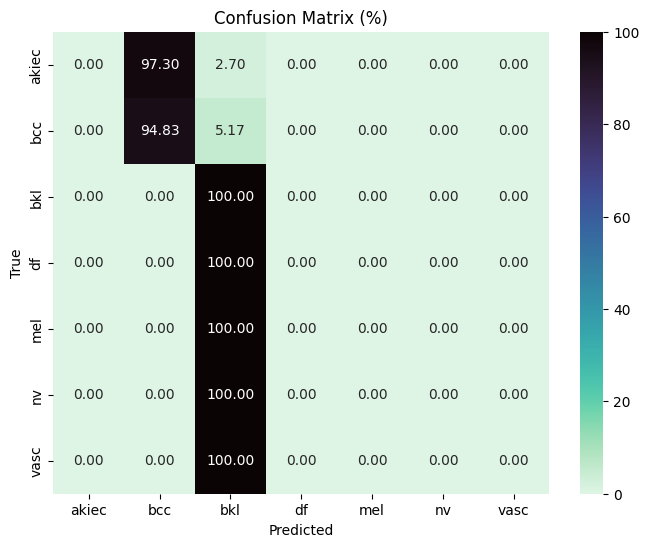

In [ ]:
evaluate_classification_report_with_matrix(model_5, X_val_image_10, y_val_categorical)

79/79 [==============================] - 5s 68ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.61      0.94      0.74       129
           2       0.12      1.00      0.21       275
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00       278
           5       0.00      0.00      0.00      1676
           6       0.00      0.00      0.00        35

    accuracy                           0.16      2504
   macro avg       0.10      0.28      0.14      2504
weighted avg       0.04      0.16      0.06      2504



C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


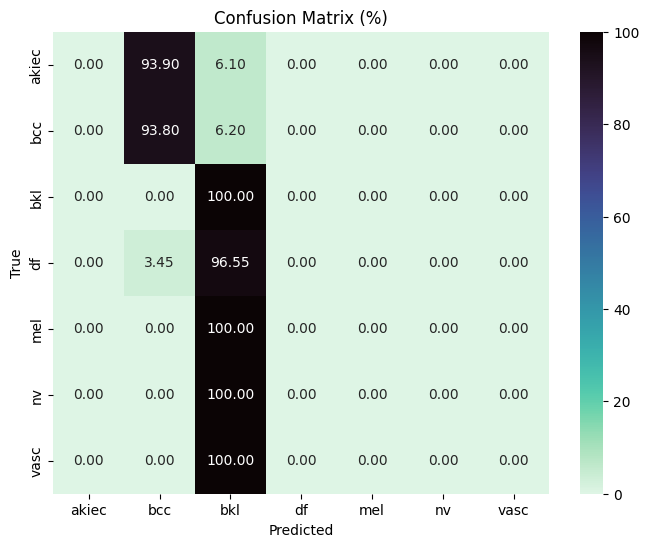

In [ ]:
evaluate_classification_report_with_matrix(model_5, X_test_image_10, y_test_categorical)

### 3.5.3. Observations <a class="anchor" id="sub_section_3_5_3"></a>

>Model overfits. We tried various things to try and solve the issue, but they only decreased performance. The current result (0.73, 0.70, 0.70) is the best scenario with that architecture.

## 3.6. Sixth Model <a class="anchor" id="section_3_6"></a>

Attempting a bigger CNN with datagen, in order to help with overfitting, in theory.

### 3.6.1 Modeling <a class="anchor" id="sub_section_3_6_1"></a>

In [ ]:
# Define input layer
input_layer = Input(shape=input_shape_10)

# Convolutional layers
conv1 = Conv2D(80, kernel_size=(3, 3), padding="same", activation="relu")(input_layer)
conv2 = Conv2D(80, kernel_size=(3, 3), padding="same", activation="relu")(conv1)
pool1 = AveragePooling2D(pool_size=(3, 3))(conv2)

conv4 = Conv2D(100, kernel_size=(3, 3), padding="same", activation="relu")(pool1)
conv5 = Conv2D(100, kernel_size=(3, 3), padding="same", activation="relu")(conv4)
pool2 = AveragePooling2D(pool_size=(3, 3))(conv5)

conv6 = Conv2D(120, kernel_size=(3, 3), padding="same", activation="relu")(pool2)

# Flatten and intermediate Dense layers
flatten = Flatten()(conv6)
dense1 = Dense(512, activation="relu", kernel_regularizer=l1(0.01))(flatten)  # Intermediate Dense layer with L2 regularization
dropout1 = Dropout(0.5)(dense1)  # Dropout layer with 50% dropout rate
dense2 = Dense(256, activation="relu", kernel_regularizer=l1(0.01))(dropout1)  # The subsequent Dense layer

# Output layer
output_layer = Dense(7, activation="softmax")(dense2)  # Output layer for classification

# Create the model
model_6 = Model(inputs=input_layer, outputs=output_layer)
model_6.summary()

# Compile the model
model_6.compile(optimizer=Adam(learning_rate = 0.002), loss='categorical_crossentropy', metrics=['accuracy'])

#Saving our first model
model_6.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/sixth_cnn_weigths.keras")

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 40, 60, 3)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 40, 60, 80)        2240      
                                                                 
 conv2d_41 (Conv2D)          (None, 40, 60, 80)        57680     
                                                                 
 average_pooling2d_16 (Aver  (None, 13, 20, 80)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_42 (Conv2D)          (None, 13, 20, 100)       72100     
                                                                 
 conv2d_43 (Conv2D)          (None, 13, 20, 100)       90100     
                                                          

In [ ]:
## Train the model using augmented data batches
history_6 = model_6.fit(datagen.flow(X_train_image_10, y_train_categorical, batch_size=200),
    batch_size=100,
    epochs=60,
    validation_data=datagen.flow(X_val_image_10, y_val_categorical, batch_size=50),
    callbacks=[reduce_lr, early_stop])

Epoch 1/60
32/32 [==============================] - 164s 5s/step - loss: 120.8290 - accuracy: 0.6576 - val_loss: 23.4474 - val_accuracy: 0.6690 - lr: 0.0020
Epoch 2/60
32/32 [==============================] - 163s 5s/step - loss: 12.1138 - accuracy: 0.6696 - val_loss: 6.4574 - val_accuracy: 0.6690 - lr: 0.0020
Epoch 3/60
32/32 [==============================] - 172s 5s/step - loss: 5.5259 - accuracy: 0.6696 - val_loss: 5.0639 - val_accuracy: 0.6690 - lr: 0.0020
Epoch 4/60
32/32 [==============================] - 155s 5s/step - loss: 5.0262 - accuracy: 0.6696 - val_loss: 4.9408 - val_accuracy: 0.6690 - lr: 0.0020
Epoch 5/60
32/32 [==============================] - 171s 5s/step - loss: 4.9083 - accuracy: 0.6732 - val_loss: 4.8055 - val_accuracy: 0.6690 - lr: 0.0020
Epoch 6/60
32/32 [==============================] - 159s 5s/step - loss: 4.8514 - accuracy: 0.6925 - val_loss: 4.8392 - val_accuracy: 0.6894 - lr: 0.0020
Epoch 7/60
32/32 [==============================] - 143s 4s/step - loss:

### 3.6.2. Check Performance <a class="anchor" id="sub_section_3_6_2"></a>

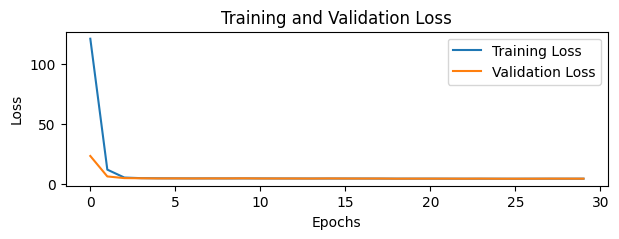

In [ ]:
plot_loss(history_6)

In [ ]:
evaluate_classification_report_with_matrix(model_6, X_train_image_10, y_train_categorical, matrix = False)

200/200 [==============================] - 42s 206ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       208
           1       0.35      0.98      0.52       327
           2       0.31      0.16      0.21       700
           3       0.00      0.00      0.00        73
           4       0.00      0.00      0.00       710
           5       0.79      0.94      0.86      4275
           6       0.00      0.00      0.00        91

    accuracy                           0.70      6384
   macro avg       0.21      0.30      0.23      6384
weighted avg       0.58      0.70      0.62      6384



C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 8s 219ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.35      0.97      0.51        58
           2       0.32      0.19      0.24       124
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00       125
           5       0.78      0.93      0.85       754
           6       0.00      0.00      0.00        16

    accuracy                           0.69      1127
   macro avg       0.21      0.30      0.23      1127
weighted avg       0.58      0.69      0.62      1127



C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


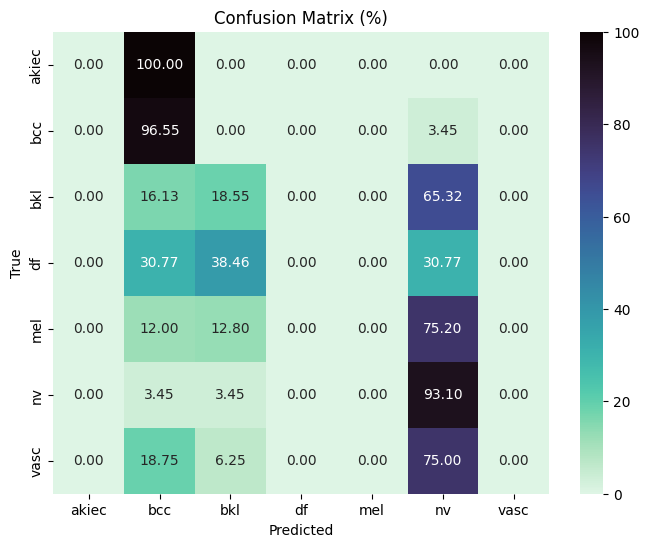

In [ ]:
evaluate_classification_report_with_matrix(model_6, X_val_image_10, y_val_categorical)

79/79 [==============================] - 17s 216ms/step


C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huawei\anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.36      0.96      0.52       129
           2       0.35      0.19      0.25       275
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00       278
           5       0.78      0.94      0.85      1676
           6       0.00      0.00      0.00        35

    accuracy                           0.70      2504
   macro avg       0.21      0.30      0.23      2504
weighted avg       0.58      0.70      0.62      2504



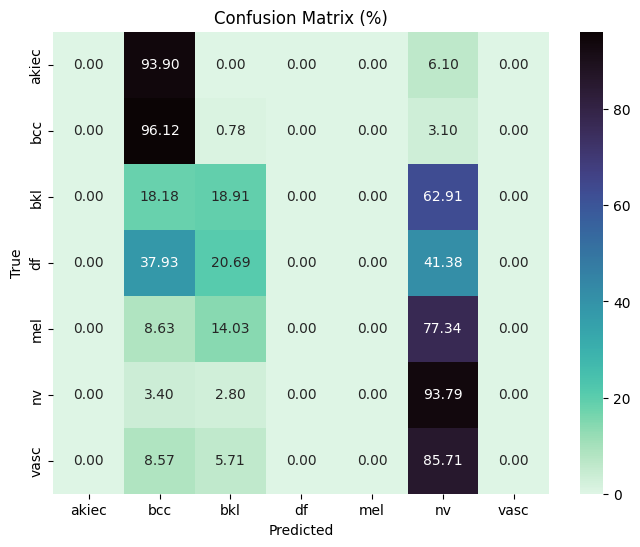

In [ ]:
evaluate_classification_report_with_matrix(model_6, X_test_image_10, y_test_categorical)

### 3.6.3. Observations <a class="anchor" id="sub_section_3_6_3"></a>

>The performance of this model was not very good. Using datagen does not seem to help, we had seen this in model 4.3, and it was proven again here.

# 4.Keras Tuner <a class="anchor" id="chapter4"></a>
-----------------------

Even though manual parameter tuning is effective and we can see the impact of small changes, it is also useful to try other methods of hyperaparameter tuning. We'll try to use keras tuner to see if the suggested answer helps improve model performance.

## 4.1. Hyperband <a class="anchor" id="section_4_1"></a>

Keras tuner offers many options, such as grid search, which is an exhaustive search, and hyperband, which does not explore every option. We will be trying hyperband, since it will allow us to experiment with more parameters. Doing grid search with the parameters we want to check would take an extremely long time and the payoff may not be as essential, since, altough we want to have a good model, we are more interested in exploring deep learning and keras and just letting a program run for a few days does not seem conducive to that, but it would be interesting for future work.


In [ ]:
def cnn_model_builder(hp):

  # Define input layer
  input_layer = Input(shape=input_shape_10)

  # Convolutional layers
  conv1_filters = hp.Int('conv1_filters', min_value=16, max_value=64, step=10)
  conv1 = Conv2D(conv1_filters, kernel_size=(3, 3), padding="same", activation="relu")(input_layer)

  conv2_filters = hp.Int('conv2_filters', min_value=16, max_value=64, step=10)
  conv2 = Conv2D(conv2_filters, kernel_size=(3, 3), padding="same", activation="relu")(conv1)

  conv3_filters = hp.Int('conv3_filters', min_value=16, max_value=64, step=10)
  conv3 = Conv2D(conv3_filters, kernel_size=(3, 3), padding="same", activation="relu")(conv2)

  pooling_choice = hp.Choice('pooling_type', ['max', 'average'])

  if pooling_choice == 'max':
    pool_layer = MaxPooling2D(pool_size=(3, 3))(conv3)
  else:
    pool_layer = AveragePooling2D(pool_size=(3, 3))(conv3)

  conv4_filters = hp.Int('conv4_filters', min_value=64, max_value=100, step=6)
  conv4 = Conv2D(conv3_filters, kernel_size=(3, 3), padding="same", activation="relu")(pool_layer)

  conv5_filters = hp.Int('conv5_filters', min_value=64, max_value=100, step=6)
  conv5 = Conv2D(conv4_filters, kernel_size=(3, 3), padding="same", activation="relu")(conv4)

  if pooling_choice == 'max':
    pool_layer1 = MaxPooling2D(pool_size=(3, 3))(conv5)
  else:
    pool_layer1 = AveragePooling2D(pool_size=(3, 3))(conv5)

  conv6_filters = hp.Int('conv6_filters', min_value=128, max_value=200, step=10)
  conv6 = Conv2D(conv3_filters, kernel_size=(3, 3), padding="same", activation="relu")(pool_layer1)


  # Flatten and intermediate Dense layers
  flatten = Flatten()(conv6)

  # Regularizer choice (L1, L2)
  reg_choice = hp.Choice('regularizer', ['l1', 'l2'])
  reg_rate = hp.Float('reg_rate', min_value=0.001, max_value=0.1, step=0.01)

  if reg_choice == 'l1':
      kernel_reg = l1(reg_rate)
  else:
      kernel_reg = l2(reg_rate)

  dense1_units = hp.Int('dense1_units', min_value=128, max_value=512, step=64)
  dense1 = Dense(dense1_units, activation="relu", kernel_regularizer=kernel_reg)(flatten)

  # Dropout rate choice
  dropout_rate = hp.Float('dropout_rate', min_value=0.5, max_value=0.9, step=0.05)
  dropout1 = Dropout(dropout_rate)(dense1)

  # Regularizer choice (L1, L2)
  reg_choice = hp.Choice('regularizer', ['l1', 'l2'])
  reg_rate = hp.Float('reg_rate', min_value=0.001, max_value=0.1, step=0.01)

  if reg_choice == 'l1':
      kernel_reg = l1(reg_rate)
  else:
      kernel_reg = l2(reg_rate)
  dense2_units = hp.Int('dense2_units', min_value=64, max_value=256, step=32)
  dense2 = Dense(dense2_units, activation="relu", kernel_regularizer=kernel_reg)(dropout1)

  # Output layer
  output_layer = Dense(7, activation="softmax")(dense2)

  # Output layer
  output_layer = Dense(7, activation="softmax")(dense2)

  # Optimizer choice and learning rate
  optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
  learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  if optimizer_choice == 'adam':
      optimizer = Adam(learning_rate=learning_rate)
  else:
      optimizer = RMSprop(learning_rate=learning_rate)

  # Create the model
  model = Model(inputs=input_layer, outputs=output_layer)

  # Compile the model
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  return model


In [ ]:
# Instantiate the tuner
tuner = kt.Hyperband(cnn_model_builder,
                     kt.Objective("val_loss", direction="min"),
                     max_epochs=20,
                     factor=3,      # Integer, the reduction factor for the number of epochs and number of models for each bracket. Defaults to 3. (from documentation)
                     directory='/content/drive/MyDrive/Deep Learning/Project - 80%/Models/KerasTuner',   # directory to save logs
                     project_name='hyper_cnn_3')

Reloading Tuner from /content/drive/MyDrive/Deep Learning/Project - 80%/Models/KerasTuner/hyper_cnn_3/tuner0.json


In [ ]:
tuner.search_space_summary()


Search space summary
Default search space size: 14
conv1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 10, 'sampling': 'linear'}
conv2_filters (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 10, 'sampling': 'linear'}
conv3_filters (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 10, 'sampling': 'linear'}
pooling_type (Choice)
{'default': 'max', 'conditions': [], 'values': ['max', 'average'], 'ordered': False}
conv4_filters (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 100, 'step': 6, 'sampling': 'linear'}
conv5_filters (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 100, 'step': 6, 'sampling': 'linear'}
conv6_filters (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 200, 'step': 10, 'sampling': 'linear'}
regularizer (Choice)
{'default': 'l1', 'conditions': [], 'values': ['l1', 'l2'], 'ordered': Fals

In [ ]:
tuner.search(X_train_image_10, y_train_categorical, epochs=30, validation_data=(X_val_image_10, y_val_categorical))


In [ ]:
best_hp=tuner.get_best_hyperparameters()[0]
print(best_hp.values)

{'conv1_filters': 26, 'conv2_filters': 46, 'conv3_filters': 46, 'pooling_type': 'average', 'conv4_filters': 82, 'conv5_filters': 82, 'conv6_filters': 168, 'regularizer': 'l2', 'reg_rate': 0.011, 'dense1_units': 128, 'dropout_rate': 0.75, 'dense2_units': 96, 'optimizer': 'rmsprop', 'learning_rate': 0.001, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0022'}


In [ ]:
#Results after the second time, with more parameters

#{'conv1_filters': 56, 'conv2_filters': 16, 'conv3_filters': 36, 'pooling_type': 'max', 'conv4_filters': 100,
#'conv5_filters': 76, 'conv6_filters': 148, 'regularizer': 'l2', 'reg_rate': 0.081, 'dense1_units': 256,
#'dropout_rate': 0.65, 'dense2_units': 96, 'optimizer': 'rmsprop', 'learning_rate': 0.001, 'tuner/epochs': 20,
#'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


#### 4.1.1. Resulting Model <a class="anchor" id="sub_section_4_1_1"></a>


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.regularizers import l2


# Define input layer
input_layer = Input(shape=input_shape_10)

# Convolutional layers
conv1 = Conv2D(56, kernel_size=(3, 3), padding="same", activation="relu")(input_layer)
conv2 = Conv2D(56, kernel_size=(3, 3), padding="same", activation="relu")(conv1)   #I am not putting 36 here, as it does not make much
                                                                    #sense to resduce the number of neurons then increase again
conv3 = Conv2D(56, kernel_size=(3, 3), padding="same", activation="relu")(conv1)
pool1 = MaxPooling2D(pool_size=(3, 3))(conv3)

conv4 = Conv2D(100, kernel_size=(3, 3), padding="same", activation="relu")(pool1)
conv5 = Conv2D(100, kernel_size=(3, 3), padding="same", activation="relu")(conv4)


# Flatten and intermediate Dense layers
flatten = Flatten()(conv5)
dense1 = Dense(256, activation="relu", kernel_regularizer=l2(0.08))(flatten)  # Intermediate Dense layer with L2 regularization
dropout1 = Dropout(0.65)(dense1)  # Dropout layer with 50% dropout rate
dense2 = Dense(96, activation="relu", kernel_regularizer=l2(0.01))(dropout1)  # The subsequent Dense layer

# Output layer
output_layer = Dense(7, activation="softmax")(dense2)  # Output layer for classification

# Create the model
model_kt = Model(inputs=input_layer, outputs=output_layer)
model_kt.summary()

#Saving our first model
model_kt.save("/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/kt_cnn.keras")

# Compile the model
model_kt.compile(optimizer=RMSprop(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 40, 60, 3)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 40, 60, 56)        1568      
                                                                 
 conv2d_27 (Conv2D)          (None, 40, 60, 56)        28280     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 20, 56)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 13, 20, 100)       50500     
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 20, 100)       90100     
                                                           

In [ ]:
history_kt = model_kt.fit(
    x=X_train_image_10,
    y=y_train_categorical,
    batch_size=200,
    epochs=40,
    validation_data=(X_val_image_10, y_val_categorical))

Epoch 1/40
32/32 [==============================] - 8s 131ms/step - loss: 6.3674 - accuracy: 0.6029 - val_loss: 2.3510 - val_accuracy: 0.6690
Epoch 2/40
32/32 [==============================] - 2s 57ms/step - loss: 1.7191 - accuracy: 0.6696 - val_loss: 1.4481 - val_accuracy: 0.6690
Epoch 3/40
32/32 [==============================] - 2s 54ms/step - loss: 1.3794 - accuracy: 0.6696 - val_loss: 1.2094 - val_accuracy: 0.6690
Epoch 4/40
32/32 [==============================] - 2s 53ms/step - loss: 1.1922 - accuracy: 0.6825 - val_loss: 1.4800 - val_accuracy: 0.6344
Epoch 5/40
32/32 [==============================] - 2s 53ms/step - loss: 1.1177 - accuracy: 0.6909 - val_loss: 1.0353 - val_accuracy: 0.6930
Epoch 6/40
32/32 [==============================] - 2s 55ms/step - loss: 1.0595 - accuracy: 0.6956 - val_loss: 1.0248 - val_accuracy: 0.6948
Epoch 7/40
32/32 [==============================] - 2s 58ms/step - loss: 1.0303 - accuracy: 0.6944 - val_loss: 1.0028 - val_accuracy: 0.6912
Epoch 8/40
3

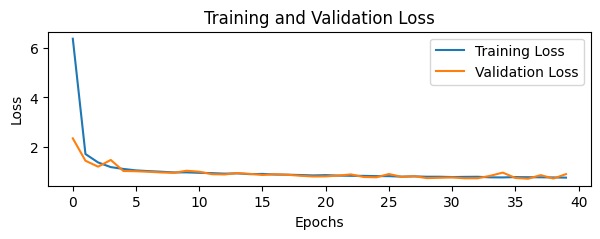

In [ ]:
plot_loss(history_kt)

In [ ]:
evaluate_classification_report_with_matrix(model_kt, X_train_image_10, y_train_categorical, matrix = False)

200/200 [==============================] - 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.95      0.55       208
           1       0.06      0.07      0.07       327
           2       0.41      0.38      0.40       700
           3       0.00      0.00      0.00        73
           4       0.00      0.00      0.00       710
           5       0.82      0.93      0.87      4275
           6       0.00      0.00      0.00        91

    accuracy                           0.70      6384
   macro avg       0.24      0.33      0.27      6384
weighted avg       0.61      0.70      0.65      6384



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36/36 [==============================] - 0s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.97      0.56        37
           1       0.04      0.05      0.04        58
           2       0.40      0.36      0.38       124
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00       125
           5       0.81      0.91      0.86       754
           6       0.00      0.00      0.00        16

    accuracy                           0.68      1127
   macro avg       0.23      0.33      0.26      1127
weighted avg       0.60      0.68      0.63      1127



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


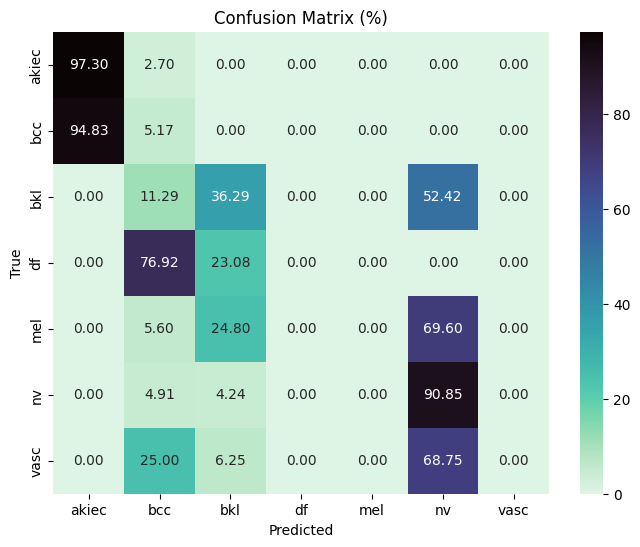

In [ ]:
evaluate_classification_report_with_matrix(model_kt, X_val_image_10, y_val_categorical)

79/79 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.93      0.54        82
           1       0.04      0.04      0.04       129
           2       0.40      0.37      0.39       275
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00       278
           5       0.81      0.92      0.86      1676
           6       0.00      0.00      0.00        35

    accuracy                           0.69      2504
   macro avg       0.23      0.32      0.26      2504
weighted avg       0.60      0.69      0.64      2504



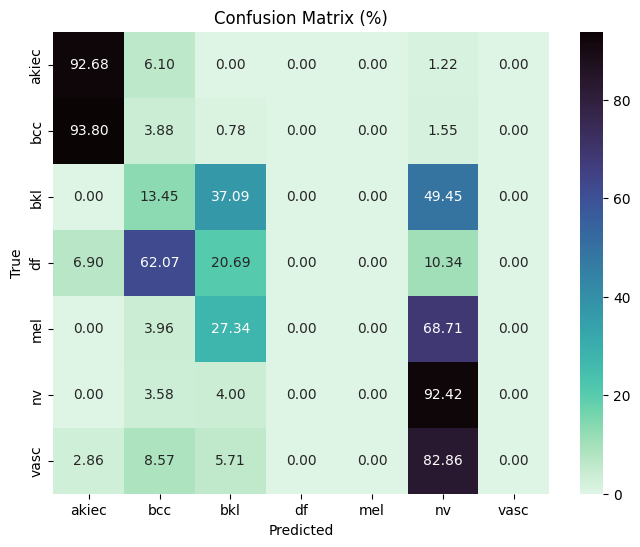

In [ ]:
evaluate_classification_report_with_matrix(model_kt, X_test_image_10, y_test_categorical)

# 5.Model Comparison  <a class="anchor" id="chapter5"></a>
-------

In [ ]:
f1_train_1, f1_val_1, f1_test_1 = get_f1_model(model_1,
                                               X_train_image_10, X_val_image_10, X_test_image_10,
                                               y_train_categorical, y_val_categorical, y_test_categorical)
f1_train_2, f1_val_2, f1_test_2 = get_f1_model(model_2,
                                               X_train_image_10, X_val_image_10, X_test_image_10,
                                               y_train_categorical, y_val_categorical, y_test_categorical)
f1_train_3, f1_val_3, f1_test_3 = get_f1_model(model_3,
                                               X_train_image_10, X_val_image_10, X_test_image_10,
                                               y_train_categorical, y_val_categorical, y_test_categorical)
f1_train_4, f1_val_4, f1_test_4 = get_f1_model(model_4,
                                               X_train_image_10, X_val_image_10, X_test_image_10,
                                               y_train_categorical, y_val_categorical, y_test_categorical)
f1_train_5, f1_val_5, f1_test_5 = get_f1_model(model_5,
                                               X_train_image_10, X_val_image_10, X_test_image_10,
                                               y_train_categorical, y_val_categorical, y_test_categorical)
f1_train_6, f1_val_6, f1_test_6 = get_f1_model(model_6,
                                               X_train_image_10, X_val_image_10, X_test_image_10,
                                               y_train_categorical, y_val_categorical, y_test_categorical)


f1_scores = pd.DataFrame({
    'Model Name': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'],
    'Train F1 Score': [f1_train_1, f1_train_2, f1_train_3, f1_train_4, f1_train_5, f1_train_6],
    'Validation F1 Score': [f1_val_1, f1_val_2, f1_val_3, f1_val_4, f1_val_5, f1_val_6],
    'Test F1 Score': [f1_test_1, f1_test_2, f1_test_3, f1_test_4, f1_test_5, f1_test_6]
})

79/79 [==============================] - 13s 159ms/step


In [ ]:
f1_scores

,Model Name,Train F1 Score,Validation F1 Score,Test F1 Score
0,Model 1,0.996533,0.727488,0.706073
1,Model 2,0.663758,0.641530,0.630431
2,Model 3,0.347021,0.373760,0.343152
3,Model 4,0.675422,0.659936,0.664676
4,Model 5,0.061461,0.061517,0.061422
5,Model 6,0.624318,0.621906,0.624717


We pick the model 4, from section 3.4, as our best model. It has the best performance overall, and even though in our example using it, it did not predict all classes well, we believe that using it with the tabular data model, which gave us fairly good results, we have good chances of obtaining a good result.

In [ ]:
#Saving the best model
f1_scores_notebook_2 = pd.DataFrame({
    'Model Name': ['Model 4'],
    'Train F1 Score': [f1_train_4],
    'Validation F1 Score': [f1_val_4],
    'Test F1 Score': [f1_test_4]
})

f1_scores_notebook_2.to_csv('/content/drive/MyDrive/Deep Learning/Project - 80%/f1_scores_notebook_2.csv', index=False)

In [ ]:
#Looking at the best model:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/Deep Learning/Project - 80%/Models/Attempts/fourth_cnn_weigths.keras')

# Display model summary
loaded_model.summary()

# Access specific layers or configuration details
# For example, to access the layers' configuration
for i, layer in enumerate(loaded_model.layers):
    print(f"Layer {i}: {layer.get_config()}")

# You can also explore other attributes and methods of the loaded model object
# For instance, you can inspect weights using
# loaded_model.get_weights()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 40, 60, 3)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 40, 60, 40)        1120      
                                                                 
 conv2d_31 (Conv2D)          (None, 40, 60, 40)        14440     
                                                                 
 average_pooling2d_6 (Avera  (None, 13, 20, 40)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_33 (Conv2D)          (None, 13, 20, 80)        28880     
                                                                 
 conv2d_34 (Conv2D)          (None, 13, 20, 80)        57680     
                                                           

In [ ]:
# Display details of each layer in the loaded model
for i, layer in enumerate(loaded_model.layers):
    print(f"Layer {i + 1}: {layer.name}")
    print(f"Input shape: {layer.input_shape}")
    print(f"Output shape: {layer.output_shape}")
    print(f"Number of parameters: {layer.count_params()}")
    print()

Layer 1: input_9
Input shape: [(None, 40, 60, 3)]
Output shape: [(None, 40, 60, 3)]
Number of parameters: 0

Layer 2: conv2d_30
Input shape: (None, 40, 60, 3)
Output shape: (None, 40, 60, 40)
Number of parameters: 1120

Layer 3: conv2d_31
Input shape: (None, 40, 60, 40)
Output shape: (None, 40, 60, 40)
Number of parameters: 14440

Layer 4: average_pooling2d_6
Input shape: (None, 40, 60, 40)
Output shape: (None, 13, 20, 40)
Number of parameters: 0

Layer 5: conv2d_33
Input shape: (None, 13, 20, 40)
Output shape: (None, 13, 20, 80)
Number of parameters: 28880

Layer 6: conv2d_34
Input shape: (None, 13, 20, 80)
Output shape: (None, 13, 20, 80)
Number of parameters: 57680

Layer 7: average_pooling2d_7
Input shape: (None, 13, 20, 80)
Output shape: (None, 4, 6, 80)
Number of parameters: 0

Layer 8: conv2d_35
Input shape: (None, 4, 6, 80)
Output shape: (None, 4, 6, 100)
Number of parameters: 72100

Layer 9: flatten_8
Input shape: (None, 4, 6, 100)
Output shape: (None, 2400)
Number of paramete

# 6.Other Attempts  <a class="anchor" id="chapter6"></a>
------


As mentioned in 3.1. First Model, here we will have the attempts with a more simple preprocessing and with higher size of the image.
> **More simple preprocessing:**

In [ ]:
# Define input layer
input_layer = Input(shape=input_shape_10)

# Convolutional layers
conv1 = Conv2D(20, kernel_size=(3, 3), padding="same", activation="relu")(input_layer)
pool1 = MaxPooling2D(pool_size=(3, 3))(conv1)
conv2 = Conv2D(40, kernel_size=(3, 3), padding="same", activation="relu")(pool1)
pool2 = MaxPooling2D(pool_size=(3, 3))(conv2)
conv3 = Conv2D(60, kernel_size=(3, 3), padding="same", activation="relu")(pool2)

# Flatten and intermediate Dense layers
flatten = Flatten()(conv3)
dense1 = Dense(512, activation="relu")(flatten)  # Intermediate Dense layer
dense2 = Dense(256, activation="relu")(dense1)  # The subsequent Dense layer

# Output layer
output_layer = Dense(7, activation="softmax")(dense2)  # Output layer for classification

# Create the model
model_1_1 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_1_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1_1 = model_1_1.fit(
    x=X_train_image_10_simples,
    y=y_train_categorical,
    batch_size=200,
    epochs=40,
    validation_data=(X_val_image_10_simples, y_val_categorical)
)

Epoch 1/40
32/32 [==============================] - 3s 25ms/step - loss: 1.1519 - accuracy: 0.6696 - val_loss: 1.0163 - val_accuracy: 0.6690
Epoch 2/40
32/32 [==============================] - 0s 13ms/step - loss: 1.0063 - accuracy: 0.6696 - val_loss: 0.9744 - val_accuracy: 0.6690
Epoch 3/40
32/32 [==============================] - 0s 12ms/step - loss: 0.9358 - accuracy: 0.6736 - val_loss: 0.9099 - val_accuracy: 0.6823
Epoch 4/40
32/32 [==============================] - 0s 11ms/step - loss: 0.8848 - accuracy: 0.6864 - val_loss: 0.8781 - val_accuracy: 0.6815
Epoch 5/40
32/32 [==============================] - 0s 11ms/step - loss: 0.8421 - accuracy: 0.6963 - val_loss: 0.8412 - val_accuracy: 0.6859
Epoch 6/40
32/32 [==============================] - 0s 12ms/step - loss: 0.8118 - accuracy: 0.7008 - val_loss: 0.7972 - val_accuracy: 0.7028
Epoch 7/40
32/32 [==============================] - 0s 11ms/step - loss: 0.7856 - accuracy: 0.7060 - val_loss: 0.7962 - val_accuracy: 0.7054
Epoch 8/40
32

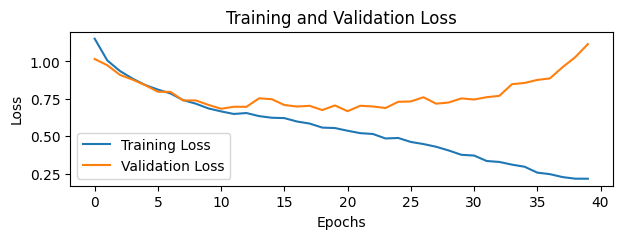

In [ ]:
plot_loss(history_1_1)

In [ ]:
evaluate_classification_report_with_matrix(model_1_1, X_train_image_10_simples, y_train_categorical, matrix = False)

200/200 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       208
           1       0.89      0.85      0.87       327
           2       0.92      0.75      0.83       700
           3       0.66      0.82      0.73        73
           4       0.89      0.80      0.84       710
           5       0.94      0.98      0.96      4275
           6       0.72      1.00      0.84        91

    accuracy                           0.92      6384
   macro avg       0.84      0.86      0.85      6384
weighted avg       0.92      0.92      0.92      6384



36/36 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.27      0.29        37
           1       0.56      0.41      0.48        58
           2       0.60      0.35      0.45       124
           3       0.16      0.23      0.19        13
           4       0.43      0.34      0.38       125
           5       0.83      0.92      0.88       754
           6       0.46      0.81      0.59        16

    accuracy                           0.74      1127
   macro avg       0.48      0.48      0.46      1127
weighted avg       0.72      0.74      0.72      1127



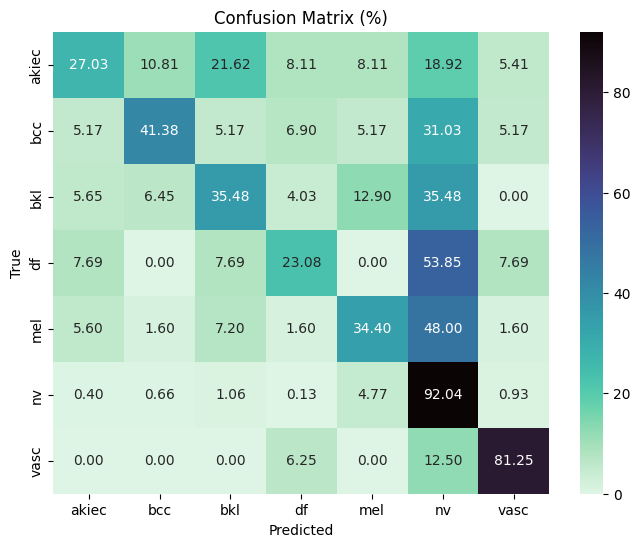

In [ ]:
evaluate_classification_report_with_matrix(model_1_1, X_val_image_10_simples, y_val_categorical)

79/79 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.29      0.31        82
           1       0.50      0.40      0.44       129
           2       0.55      0.38      0.45       275
           3       0.27      0.34      0.30        29
           4       0.50      0.40      0.45       278
           5       0.85      0.92      0.88      1676
           6       0.34      0.71      0.46        35

    accuracy                           0.74      2504
   macro avg       0.48      0.49      0.47      2504
weighted avg       0.73      0.74      0.73      2504



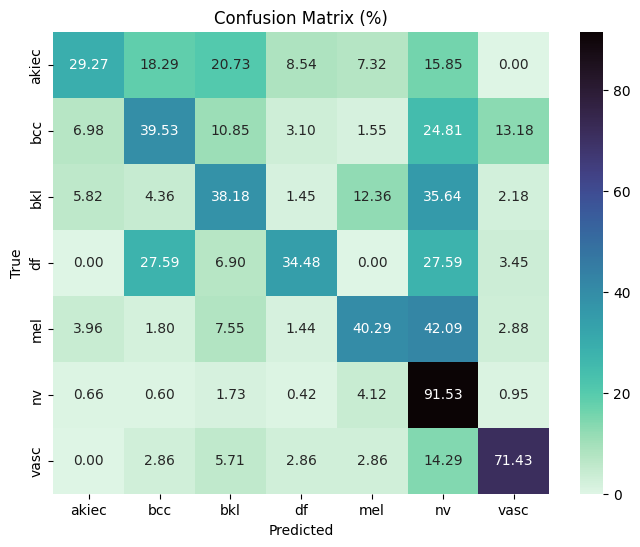

In [ ]:
evaluate_classification_report_with_matrix(model_1_1, X_test_image_10_simples, y_test_categorical)

Altough the results aren't bad, this model starts to overfit at an earlier epoch than the one with more complex preprocessing, present in section 3.1., and it is more interesting to use those images also in terms of exploring all the facets that this area of prediction from images has to offer, hence that is the best choice for us.

> **Model with images with size at 20% of the original:**

In [ ]:
# Define input layer
input_layer = Input(shape=input_shape_20)

# Convolutional layers
conv1 = Conv2D(20, kernel_size=(3, 3), padding="same", activation="relu")(input_layer)
pool1 = MaxPooling2D(pool_size=(3, 3))(conv1)
conv2 = Conv2D(40, kernel_size=(3, 3), padding="same", activation="relu")(pool1)
pool2 = MaxPooling2D(pool_size=(3, 3))(conv2)
conv3 = Conv2D(60, kernel_size=(3, 3), padding="same", activation="relu")(pool2)

# Flatten and intermediate Dense layers
flatten = Flatten()(conv3)
dense1 = Dense(512, activation="relu")(flatten)  # Intermediate Dense layer
dense2 = Dense(256, activation="relu")(dense1)  # The subsequent Dense layer

# Output layer
output_layer = Dense(7, activation="softmax")(dense2)  # Output layer for classification

# Create the model
model_1_2 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_1_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1_2 = model_1_2.fit(
    x=X_train_image_20,
    y=y_train_categorical,
    batch_size=200,
    epochs=40,
    validation_data=(X_val_image_20, y_val_categorical))

Epoch 1/40
32/32 [==============================] - 9s 82ms/step - loss: 1.0656 - accuracy: 0.6640 - val_loss: 0.8985 - val_accuracy: 0.6815
Epoch 2/40
32/32 [==============================] - 1s 33ms/step - loss: 0.8355 - accuracy: 0.7101 - val_loss: 0.8220 - val_accuracy: 0.7045
Epoch 3/40
32/32 [==============================] - 1s 35ms/step - loss: 0.7694 - accuracy: 0.7279 - val_loss: 0.7553 - val_accuracy: 0.7276
Epoch 4/40
32/32 [==============================] - 1s 35ms/step - loss: 0.7311 - accuracy: 0.7397 - val_loss: 0.8349 - val_accuracy: 0.7232
Epoch 5/40
32/32 [==============================] - 1s 35ms/step - loss: 0.7107 - accuracy: 0.7420 - val_loss: 0.7139 - val_accuracy: 0.7374
Epoch 6/40
32/32 [==============================] - 1s 35ms/step - loss: 0.6138 - accuracy: 0.7741 - val_loss: 0.6921 - val_accuracy: 0.7409
Epoch 7/40
32/32 [==============================] - 1s 35ms/step - loss: 0.5592 - accuracy: 0.7926 - val_loss: 0.6935 - val_accuracy: 0.7427
Epoch 8/40
32

In [ ]:
evaluate_classification_report_with_matrix(model_1_2, X_train_image_20, y_train_categorical, matrix = False)

200/200 [==============================] - 1s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       208
           1       0.96      1.00      0.98       327
           2       0.94      1.00      0.97       700
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00       710
           5       1.00      0.99      0.99      4275
           6       1.00      1.00      1.00        91

    accuracy                           0.99      6384
   macro avg       0.99      0.99      0.99      6384
weighted avg       0.99      0.99      0.99      6384



36/36 [==============================] - 0s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.41      0.51        37
           1       0.65      0.64      0.64        58
           2       0.34      0.41      0.38       124
           3       0.42      0.38      0.40        13
           4       0.30      0.31      0.31       125
           5       0.84      0.83      0.83       754
           6       0.50      0.38      0.43        16

    accuracy                           0.69      1127
   macro avg       0.53      0.48      0.50      1127
weighted avg       0.70      0.69      0.69      1127



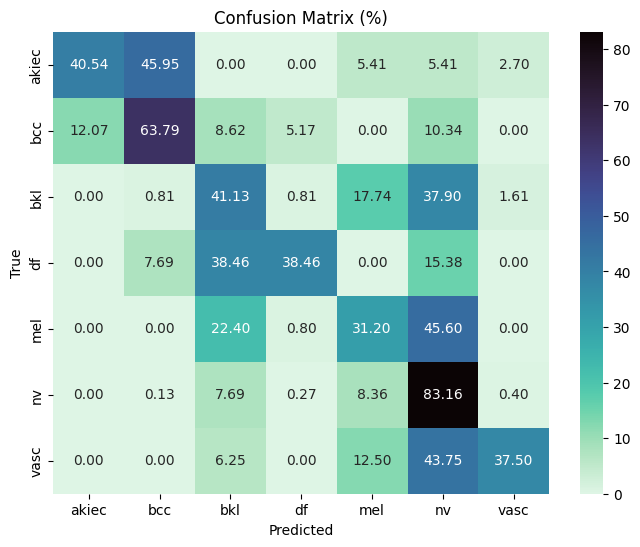

In [ ]:
evaluate_classification_report_with_matrix(model_1_2, X_val_image_20, y_val_categorical)

79/79 [==============================] - 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.29      0.39        82
           1       0.68      0.73      0.70       129
           2       0.37      0.47      0.41       275
           3       0.53      0.31      0.39        29
           4       0.31      0.30      0.30       278
           5       0.84      0.84      0.84      1676
           6       0.58      0.40      0.47        35

    accuracy                           0.70      2504
   macro avg       0.56      0.48      0.50      2504
weighted avg       0.71      0.70      0.70      2504



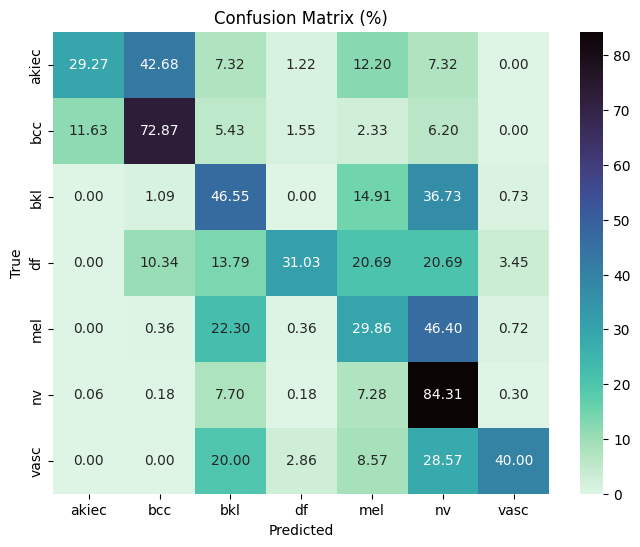

In [ ]:
evaluate_classification_report_with_matrix(model_1_2, X_test_image_20, y_test_categorical)

As mentioned at the beggining of this notebook, increasing the image size does not help in overall performance, at least using a simple model. And since the images of this size could potentially cause us memory issues with more layers and neurons, it was better for us to just use the images at 10% of the original.